In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

for path, dirs, files in os.walk("/content/drive/MyDrive"):
    print(path)


/content/drive/MyDrive
/content/drive/MyDrive/rdfia
/content/drive/MyDrive/rdfia/sift
/content/drive/MyDrive/rdfia/sift/CALsuburb
/content/drive/MyDrive/rdfia/sift/MITcoast
/content/drive/MyDrive/rdfia/sift/MITforest
/content/drive/MyDrive/rdfia/sift/MIThighway
/content/drive/MyDrive/rdfia/sift/MITinsidecity
/content/drive/MyDrive/rdfia/sift/MITmountain
/content/drive/MyDrive/rdfia/sift/MITopencountry
/content/drive/MyDrive/rdfia/sift/MITstreet
/content/drive/MyDrive/rdfia/sift/MITtallbuilding
/content/drive/MyDrive/rdfia/sift/PARoffice
/content/drive/MyDrive/rdfia/sift/bedroom
/content/drive/MyDrive/rdfia/sift/industrial
/content/drive/MyDrive/rdfia/sift/kitchen
/content/drive/MyDrive/rdfia/sift/livingroom
/content/drive/MyDrive/rdfia/sift/store
/content/drive/MyDrive/rdfia/kmeans
/content/drive/MyDrive/Assignment1
/content/drive/MyDrive/Assignment1/.idea
/content/drive/MyDrive/Assignment1/.idea/inspectionProfiles
/content/drive/MyDrive/ANN (1)
/content/drive/MyDrive/ANN (1)/LAB1
/con

In [ ]:
import os

base_path = "/content/drive/MyDrive/data_genhack/main"  # adjust name
for root, dirs, files in os.walk(base_path):
    print(root)
    for f in files:
        print("   ", f)


/content/drive/MyDrive/data_genhack
/content/drive/MyDrive/data_genhack/main
    ECA_blend_tx.zip
    gadm_410_europe.gpkg
    read-era5-netcdf_v2.ipynb
    GenHack - Kayrros data User Guide.gdoc
/content/drive/MyDrive/data_genhack/main/derived-era5-land-daily-statistics
    2021_10m_v_component_of_wind_daily_mean.nc
    2021_10m_u_component_of_wind_daily_mean.nc
    2020_10m_v_component_of_wind_daily_mean.nc
    2020_2m_temperature_daily_maximum.nc
    2020_10m_u_component_of_wind_daily_mean.nc
    2022_2m_temperature_daily_maximum.nc
    2022_10m_v_component_of_wind_daily_mean.nc
    2023_10m_u_component_of_wind_daily_mean.nc
    2022_10m_u_component_of_wind_daily_mean.nc
    2021_2m_temperature_daily_maximum.nc
    2023_2m_temperature_daily_maximum.nc
    2025_10m_u_component_of_wind_daily_mean.nc
    2024_2m_temperature_daily_maximum.nc
    2024_10m_u_component_of_wind_daily_mean.nc
    2025_2m_temperature_daily_maximum.nc
    2023_10m_v_component_of_wind_daily_mean.nc
    2025_10m

ERA5 (NetCDF) – derived-era5-land-daily-statistics

---



In [ ]:
import xarray as xr
import os

era5_example = os.path.join(
    base_path,
    "derived-era5-land-daily-statistics",
    "2022_2m_temperature_daily_maximum.nc"
)

ds = xr.open_dataset(era5_example)

print(ds)               # overview: dims, coords, data_vars
print("\nData variables:", list(ds.data_vars))
print("\nDimensions:", ds.dims)

# Time range (if time coord exists)
if "time" in ds.coords:
    print("Time range:", str(ds.time.min().values), "→", str(ds.time.max().values))

# Try to guess lat/lon names
for cand in ["latitude", "lat"]:
    if cand in ds.dims:
        print("Lat size:", ds.dims[cand])
for cand in ["longitude", "lon"]:
    if cand in ds.dims:
        print("Lon size:", ds.dims[cand])


<xarray.Dataset> Size: 337MB
Dimensions:     (valid_time: 365, latitude: 350, longitude: 660)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 3kB 2022-01-01 ... 2022-12-31
  * latitude    (latitude) float64 3kB 69.9 69.8 69.7 69.6 ... 35.2 35.1 35.0
  * longitude   (longitude) float64 5kB -25.0 -24.9 -24.8 ... 40.7 40.8 40.9
    number      int64 8B ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 337MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-10-03T22:25 GRIB to CDM+CF via cfgrib-0.9.1...

Data variables: ['t2m']

Dimensions: FrozenMappingWarningOnValuesAccess({'valid_time': 365, 'latitude': 350, 'longitude': 660})
Lat size: 350
Lon size: 660


/tmp/ipython-input-3477960810.py:23: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  print("Lat size:", ds.dims[cand])
/tmp/ipython-input-3477960810.py:26: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  print("Lon size:", ds.dims[cand])


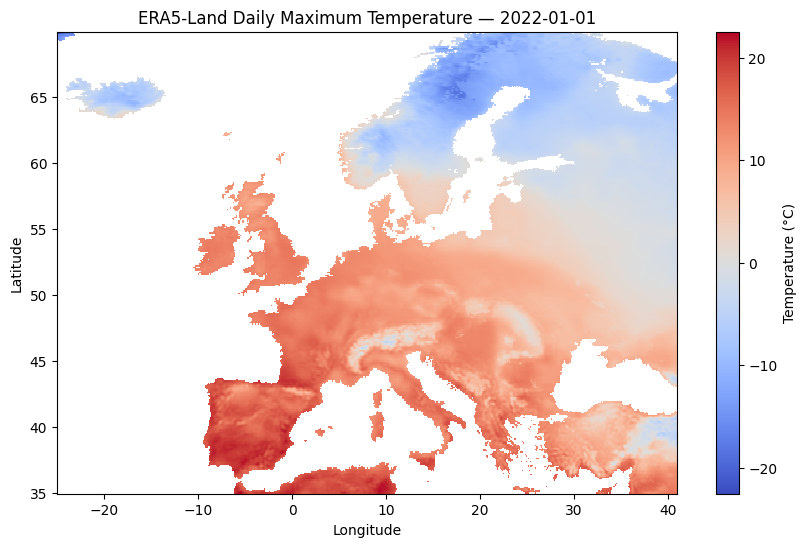

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt

# Path to your ERA5 file (adjust year if needed)
era5_path = os.path.join(base_path, "derived-era5-land-daily-statistics/2022_2m_temperature_daily_maximum.nc")

# Load NetCDF with xarray
ds = xr.open_dataset(era5_path)

# Convert from Kelvin to Celsius (optional)
t2m = ds['t2m'] - 273.15

# Choose a day to plot (0 = Jan 1, 1 = Jan 2, ..., 364 = Dec 31)
day_idx = 0  # change this number to plot other days

# Extract the selected day's map
t2m_day = t2m.isel(valid_time=day_idx)

# Plot
plt.figure(figsize=(10,6))
t2m_day.plot(
    cmap="coolwarm",
    cbar_kwargs={"label": "Temperature (°C)"}
)

plt.title(f"ERA5-Land Daily Maximum Temperature — {str(t2m_day.valid_time.values)[:10]}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.3/278.3 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of cartopy to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 98.9 MB/s eta 0:00:00
  Created wheel for shapely: filename=Shapely-1.8.0-py3-none-any.whl size=177357 sha256=4b7bcc32b4cc25cd6a8e07828ba7a934913d467f0473a7a5defb13f857b23bb6
  Stored in directory: /root/.cache/pip/wheels/9f/d2/64/b11b35ba26871cb644b2019fba12e089f1db06c3696402eadb
Successfully built shapely
  Attempting uninstall: shapely
    Found existing installation: shapely 2.1.2
    Uninstalling shapely-2.1.2:
      Successfully uninstalled shapely-2.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.28.0 requires shapely>=1.

/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


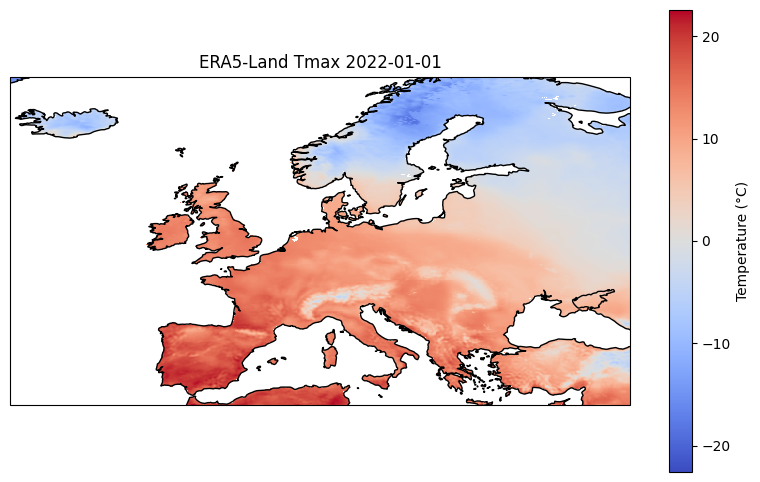

In [ ]:
!pip install cartopy shapely==1.8.0

import cartopy.crs as ccrs

plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.PlateCarree())
t2m_day.plot(ax=ax, cmap='coolwarm', transform=ccrs.PlateCarree(),
             cbar_kwargs={'label': 'Temperature (°C)'})
ax.coastlines()
ax.set_title(f"ERA5-Land Tmax {str(t2m_day.valid_time.values)[:10]}")
plt.show()


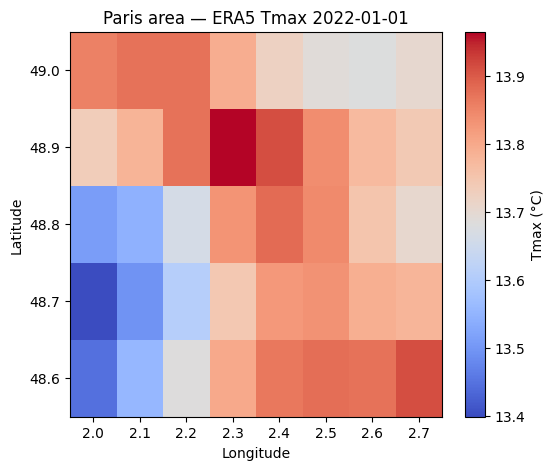

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt

# Path to your ERA5 file (adjust year if needed)
era5_path = os.path.join(base_path, "derived-era5-land-daily-statistics/2022_2m_temperature_daily_maximum.nc")

# Load NetCDF with xarray
ds = xr.open_dataset(era5_path)

# Convert from Kelvin to Celsius (optional)
t2m = ds['t2m'] - 273.15

# Define city bounding box (example: Paris)
city_name = "Paris"
lat_min, lat_max = 48.6, 49.1
lon_min, lon_max = 2.0, 2.7

# Crop ERA5 for a given day
day_idx = 0
t2m_day = t2m.isel(valid_time=day_idx)

t2m_city = t2m_day.sel(
    latitude=slice(lat_max, lat_min),  # note: descending latitude axis!
    longitude=slice(lon_min, lon_max)
)

plt.figure(figsize=(6, 5))
t2m_city.plot(
    cmap="coolwarm",
    cbar_kwargs={"label": "Tmax (°C)"}
)
plt.title(f"{city_name} area — ERA5 Tmax {str(t2m_city.valid_time.values)[:10]}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


-compute temperature anomalies

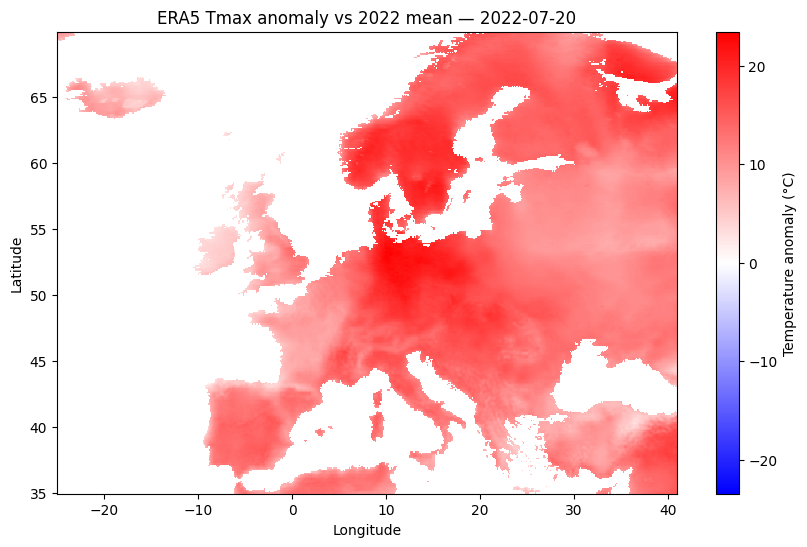

In [ ]:
# t2m: (time, lat, lon) in °C

# Convert from Kelvin to Celsius (optional)
t2m = ds['t2m'] - 273.15
# 1. Compute annual mean at each grid cell
climatology_2022 = t2m.mean(dim="valid_time")  # shape: (lat, lon)

# 2. Compute anomalies for all days
t2m_anom = t2m - climatology_2022  # same shape as t2m

# 3. Plot anomaly map for a chosen day
day_idx = 200  # e.g., mid-summer
anom_day = t2m_anom.isel(valid_time=day_idx)

plt.figure(figsize=(10, 6))
anom_day.plot(
    cmap="bwr",
    center=0.0,
    cbar_kwargs={"label": "Temperature anomaly (°C)"}
)
plt.title(f"ERA5 Tmax anomaly vs 2022 mean — {str(anom_day.valid_time.values)[:10]}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [ ]:
import matplotlib.animation as animation
import numpy as np

# We'll animate the original t2m or the anomalies.
data_to_animate = t2m  # or t2m_anom if you want anomalies

fig, ax = plt.subplots(figsize=(8, 5))

# Initial frame
frame0 = data_to_animate.isel(valid_time=0)
im = frame0.plot(
    ax=ax,
    cmap="coolwarm",
    add_colorbar=True,
    cbar_kwargs={"label": "Tmax (°C)"}
)

title = ax.set_title(f"ERA5 Tmax — {str(frame0.valid_time.values)[:10]}")

def update(frame_idx):
    ax.clear()
    frame = data_to_animate.isel(valid_time=frame_idx)
    im = frame.plot(
        ax=ax,
        cmap="coolwarm",
        add_colorbar=False  # only one colorbar (optional)
    )
    ax.set_title(f"ERA5 Tmax — {str(frame.valid_time.values)[:10]}")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    return [im]

anim = animation.FuncAnimation(
    fig,
    update,
    frames=data_to_animate.sizes["valid_time"],  # 365
    interval=150,   # ms between frames
    blit=False
)

plt.close(fig)  # avoids double display in some environments


In [ ]:
from IPython.display import HTML
HTML(anim.to_jshtml())


In [ ]:
anim.save("era5_tmax_2022.mp4", writer="ffmpeg", dpi=150)


ERA5 (NetCDF) – derived-era5-single-levels-daily-statistics

In [ ]:
era5_single = os.path.join(base_path, "derived-era5-single-levels-daily-statistics")
single_files = sorted(os.listdir(era5_single))
single_example = os.path.join(era5_single, single_files[0])

print("Opening:", single_example)
ds_single = xr.open_dataset(single_example)

print(ds_single)
print("\nVariables:", list(ds_single.data_vars))
print("Dimensions:", ds_single.dims)


Opening: /content/drive/MyDrive/data_genhack/derived-era5-single-levels-daily-statistics/2015_10m_u_component_of_wind_daily_mean.nc
<xarray.Dataset> Size: 55MB
Dimensions:     (valid_time: 365, latitude: 141, longitude: 265)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 3kB 2015-01-01 ... 2015-12-31
  * latitude    (latitude) float64 1kB 70.0 69.75 69.5 69.25 ... 35.5 35.25 35.0
  * longitude   (longitude) float64 2kB -25.0 -24.75 -24.5 ... 40.5 40.75 41.0
    number      int64 8B ...
Data variables:
    u10         (valid_time, latitude, longitude) float32 55MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-09-21T00:08 GRIB to CDM+CF via cfgrib-0.9.1...

Variables: ['u10']
Dimensions: FrozenMappingWarningOnValuesAc

In [ ]:
single_dir = "/content/drive/MyDrive/data_genhack/main/derived-era5-single-levels-daily-statistics"
land_dir   = "/content/drive/MyDrive/data_genhack/main/derived-era5-land-daily-statistics"
year = 2015


In [ ]:
import os, re


def list_years_nc(folder, var_prefix):
    years = set()
    for f in os.listdir(folder):
        if f.endswith(".nc") and f.startswith(tuple(str(y) for y in range(2000, 2031))):
            try:
                year = int(f.split("_")[0])
                years.add(year)
            except Exception:
                pass
    return sorted(years)

years_single = list_years_nc(single_dir, "")
years_land   = list_years_nc(land_dir, "")

print("Single-levels years:", years_single)
print("Land years:", years_land)


Single-levels years: [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]
Land years: [2020, 2021, 2022, 2023, 2024, 2025]


In [ ]:
year = 2022  # use a year that exists in BOTH folders


u_path   = f"{single_dir}/{year}_10m_u_component_of_wind_daily_mean.nc"
v_path   = f"{single_dir}/{year}_10m_v_component_of_wind_daily_mean.nc"
t2m_s_path = f"{single_dir}/{year}_2m_temperature_daily_maximum.nc"
t2m_l_path = f"{land_dir}/{year}_2m_temperature_daily_maximum.nc"

import xarray as xr

ds_u   = xr.open_dataset(u_path)
ds_v   = xr.open_dataset(v_path)
ds_t2m_s = xr.open_dataset(t2m_s_path)
ds_t2m_l = xr.open_dataset(t2m_l_path)

u10   = ds_u["u10"]
v10   = ds_v["v10"]
t2m_s = ds_t2m_s["t2m"] - 273.15  # °C
t2m_l = ds_t2m_l["t2m"] - 273.15  # °C

print("u10 shape:", u10.shape)
print("t2m_single shape:", t2m_s.shape)
print("t2m_land shape:", t2m_l.shape)


u10 shape: (365, 141, 265)
t2m_single shape: (365, 141, 265)
t2m_land shape: (365, 350, 660)


Seasonal mean wind speed in 2022

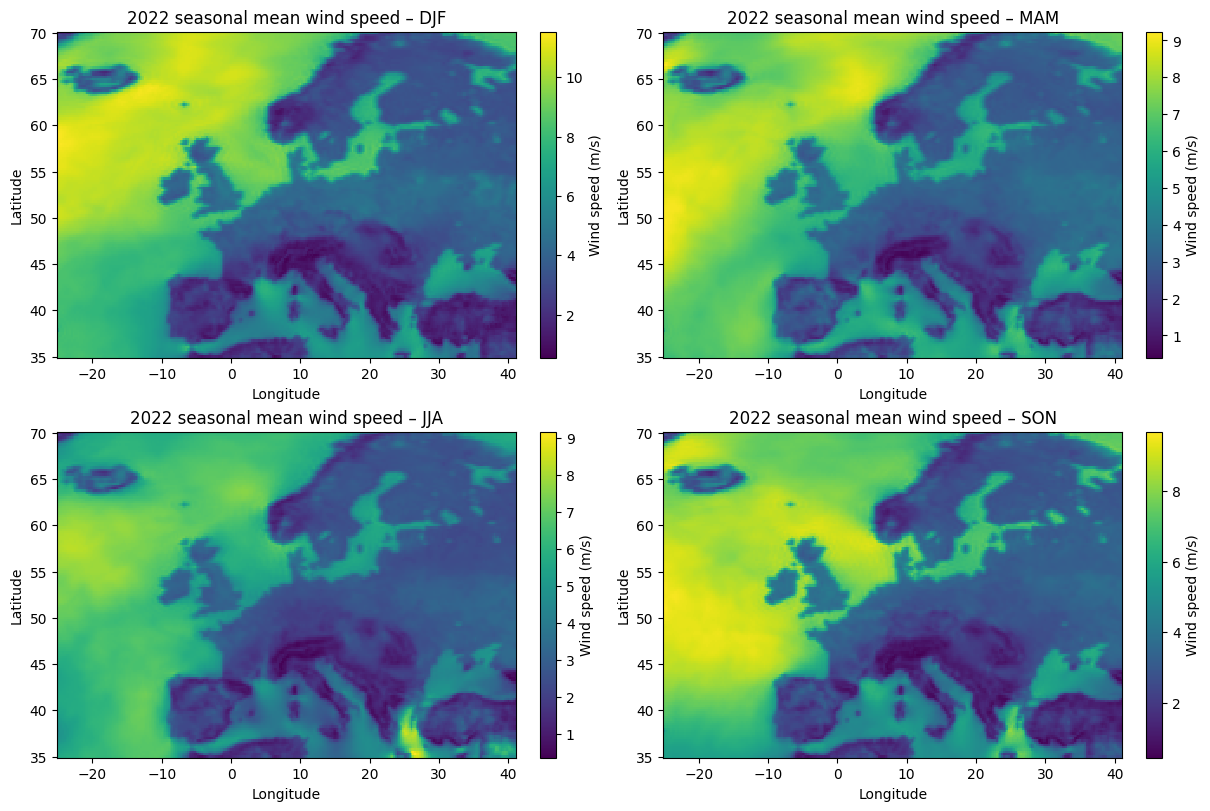

In [ ]:
# Wind speed
wind_speed = np.sqrt(u10**2 + v10**2)  # m/s

# Define seasons by month
month = u10["valid_time"].dt.month

seasons = {
    "DJF": [12, 1, 2],
    "MAM": [3, 4, 5],
    "JJA": [6, 7, 8],
    "SON": [9, 10, 11],
}

fig, axes = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)
axes = axes.ravel()

for ax, (name, months) in zip(axes, seasons.items()):
    mask = month.isin(months)
    ws_season = wind_speed.where(mask, drop=True).mean("valid_time")
    ws_season.plot(
        ax=ax,
        cmap="viridis",
        cbar_kwargs={"label": "Wind speed (m/s)"},
    )
    ax.set_title(f"{year} seasonal mean wind speed – {name}")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

plt.show()


Wind arrows on top of a temperature map (single day)

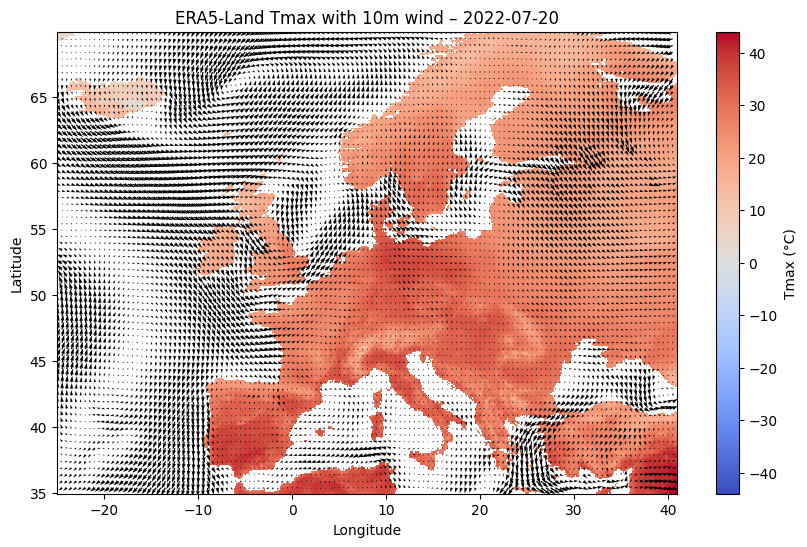

In [ ]:
day_idx = 200  # pick any day 0–364

# Select same day
t_day_land = t2m_l.isel(valid_time=day_idx)
u_day = u10.isel(valid_time=day_idx)
v_day = v10.isel(valid_time=day_idx)

# Interpolate wind onto the finer land grid (so arrows align with temp map)
u_on_land = u_day.interp(latitude=t_day_land.latitude, longitude=t_day_land.longitude)
v_on_land = v_day.interp(latitude=t_day_land.latitude, longitude=t_day_land.longitude)

# Subsample for clearer arrows
step = 5
lats = t_day_land.latitude[::step]
lons = t_day_land.longitude[::step]
u_plot = u_on_land.sel(latitude=lats, longitude=lons)
v_plot = v_on_land.sel(latitude=lats, longitude=lons)

fig, ax = plt.subplots(figsize=(10, 6))

# Temperature background
t_day_land.plot(
    ax=ax,
    cmap="coolwarm",
    cbar_kwargs={"label": "Tmax (°C)"},
)

# Wind vectors
lon2d, lat2d = np.meshgrid(lons, lats)
ax.quiver(
    lon2d,
    lat2d,
    u_plot.values,
    v_plot.values,
    scale=600,  # tweak for arrow length
    width=0.002,
    color="k",
)

ax.set_title(f"ERA5-Land Tmax with 10m wind – {str(t_day_land.valid_time.values)[:10]}")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()


Compare ERA5-Land vs ERA5 (single-levels) Tmax for the same day

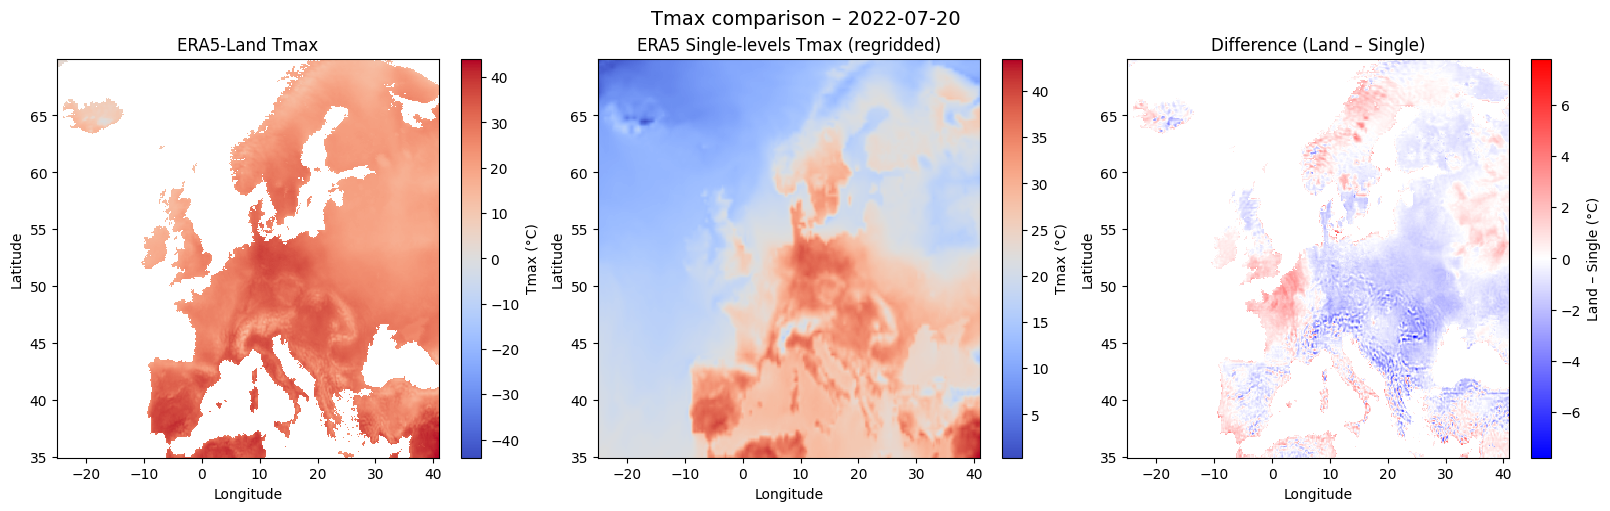

In [ ]:
day_idx = 200

t_land = t2m_l.isel(valid_time=day_idx)
t_single = t2m_s.isel(valid_time=day_idx)

# Interpolate single-levels onto land grid (so we can compare)
t_single_on_land = t_single.interp(
    latitude=t_land.latitude,
    longitude=t_land.longitude
)

diff = t_land - t_single_on_land  # positive = land warmer than single-levels

fig, axes = plt.subplots(1, 3, figsize=(16, 5), constrained_layout=True)

t_land.plot(ax=axes[0], cmap="coolwarm",
            cbar_kwargs={"label": "Tmax (°C)"})
axes[0].set_title("ERA5-Land Tmax")

t_single_on_land.plot(ax=axes[1], cmap="coolwarm",
                      cbar_kwargs={"label": "Tmax (°C)"})
axes[1].set_title("ERA5 Single-levels Tmax (regridded)")

diff.plot(ax=axes[2], cmap="bwr", center=0,
          cbar_kwargs={"label": "Land – Single (°C)"})
axes[2].set_title("Difference (Land – Single)")

for ax in axes:
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

fig.suptitle(f"Tmax comparison – {str(t_land.valid_time.values)[:10]}", fontsize=14)
plt.show()


Correlation between wind speed and Tmax anomalies (domain-mean)

Correlation between wind speed and Tmax anomaly: -0.7289451467270202


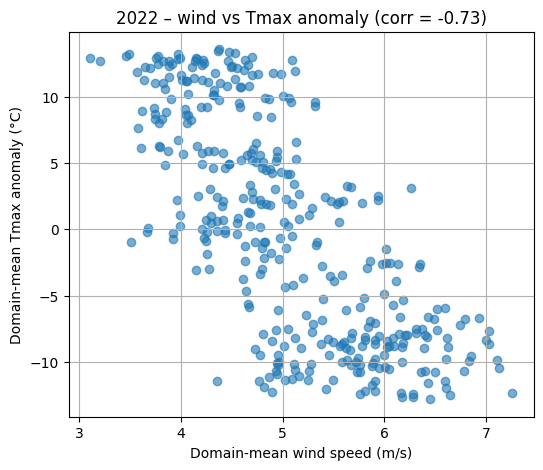

In [ ]:
# Mean over space (Europe domain)
ws_mean = wind_speed.mean(dim=("latitude", "longitude"))           # (time,)
t_mean  = t2m_l.mean(dim=("latitude", "longitude"))                # (time,)

# Anomaly of Tmax wrt annual mean
t_clim = t_mean.mean("valid_time")
t_anom = t_mean - t_clim

# Quick correlation
corr = np.corrcoef(ws_mean.values, t_anom.values)[0, 1]
print("Correlation between wind speed and Tmax anomaly:", corr)

# Scatter plot
plt.figure(figsize=(6, 5))
plt.scatter(ws_mean, t_anom, alpha=0.6)
plt.xlabel("Domain-mean wind speed (m/s)")
plt.ylabel("Domain-mean Tmax anomaly (°C)")
plt.title(f"{year} – wind vs Tmax anomaly (corr = {corr:.2f})")
plt.grid(True)
plt.show()


Identify “stagnant hot days” (candidate heat-dome days)

Candidate 'hot & stagnant' days:
2022-06-01
2022-06-02
2022-06-03
2022-06-04
2022-06-05
2022-06-07
2022-06-08
2022-06-14
2022-06-15
2022-06-16
2022-06-17
2022-06-21
2022-06-26
2022-06-27
2022-06-29
2022-06-30
2022-07-01
2022-07-02
2022-07-04
2022-07-09
2022-07-10
2022-07-15
2022-07-16
2022-07-17
2022-07-18
2022-07-19
2022-07-20
2022-07-21
2022-07-22
2022-07-23
2022-07-24
2022-07-25
2022-07-26
2022-07-27
2022-07-28
2022-07-29
2022-07-31
2022-08-01
2022-08-02
2022-08-08
2022-08-12
2022-08-13
2022-08-14
2022-08-15
2022-08-21
2022-08-22
2022-08-23
2022-08-24
2022-08-25
2022-08-26
2022-08-27
2022-08-28
2022-08-29
2022-08-30
2022-08-31


/tmp/ipython-input-2804019342.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  idx = int(np.argwhere(ds_u["valid_time"].values == hot_stagnant_days.values[0]))


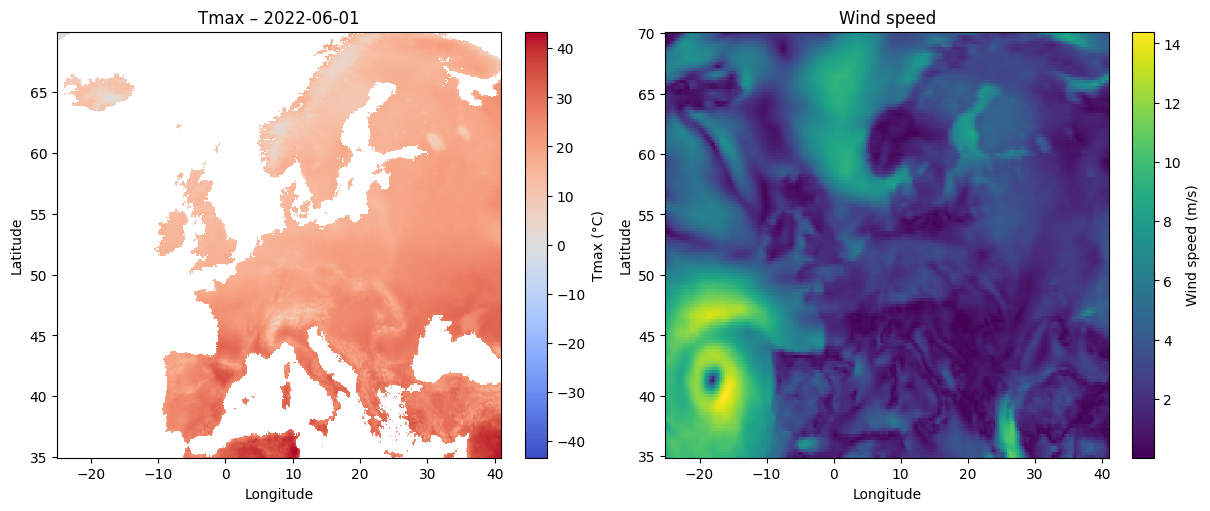

In [ ]:
# Thresholds
ws_low_thr = np.percentile(ws_mean.values, 25)
t_high_thr = np.percentile(t_anom.values, 75)

flags = (ws_mean < ws_low_thr) & (t_anom > t_high_thr)

hot_stagnant_days = ws_mean["valid_time"].where(flags, drop=True)

print("Candidate 'hot & stagnant' days:")
for t in hot_stagnant_days.values:
    print(str(t)[:10])

# Optional: visualize one of those days
if len(hot_stagnant_days) > 0:
    idx = int(np.argwhere(ds_u["valid_time"].values == hot_stagnant_days.values[0]))
    t_day = t2m_l.isel(valid_time=idx)
    ws_day = wind_speed.isel(valid_time=idx)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)
    t_day.plot(ax=axes[0], cmap="coolwarm",
               cbar_kwargs={"label": "Tmax (°C)"})
    axes[0].set_title(f"Tmax – {str(t_day.valid_time.values)[:10]}")

    ws_day.plot(ax=axes[1], cmap="viridis",
                cbar_kwargs={"label": "Wind speed (m/s)"})
    axes[1].set_title("Wind speed")
    for ax in axes:
        ax.set_xlabel("Longitude")
        ax.set_ylabel("Latitude")
    plt.show()


--Paris focus

In [ ]:

year = 2022

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

u_path    = f"{single_dir}/{year}_10m_u_component_of_wind_daily_mean.nc"
v_path    = f"{single_dir}/{year}_10m_v_component_of_wind_daily_mean.nc"
t2m_l_path = f"{land_dir}/{year}_2m_temperature_daily_maximum.nc"

ds_u   = xr.open_dataset(u_path)
ds_v   = xr.open_dataset(v_path)
ds_t2m_l = xr.open_dataset(t2m_l_path)

u10   = ds_u["u10"]
v10   = ds_v["v10"]
t2m_l = ds_t2m_l["t2m"] - 273.15  # °C


In [ ]:
# Bounding box per l’area di Parigi
city_name = "Paris"
lat_min, lat_max = 48.6, 49.1
lon_min, lon_max = 2.0, 2.7

# ATTENZIONE: le latitudini in ERA5 sono decrescenti (70 → 35)
t2m_paris = t2m_l.sel(
    latitude=slice(lat_max, lat_min),
    longitude=slice(lon_min, lon_max),
)

u10_paris = u10.sel(
    latitude=slice(lat_max, lat_min),
    longitude=slice(lon_min, lon_max),
)

v10_paris = v10.sel(
    latitude=slice(lat_max, lat_min),
    longitude=slice(lon_min, lon_max),
)

print(t2m_paris.shape, u10_paris.shape, v10_paris.shape)


(365, 5, 8) (365, 2, 3) (365, 2, 3)


--Tmax map and wind vectors over Paris

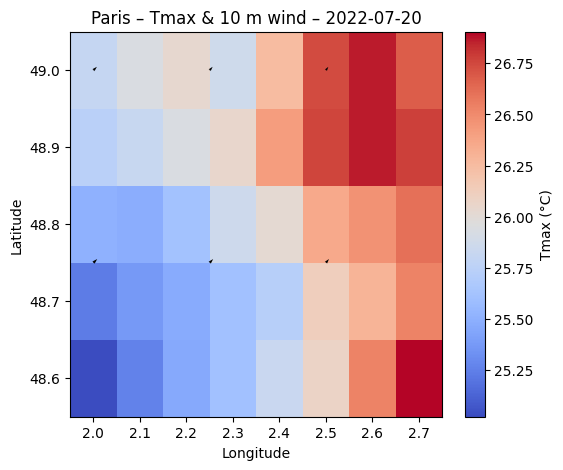

In [ ]:
day_idx = 200  # choose the day (0–364)

t_day_paris = t2m_paris.isel(valid_time=day_idx)
u_day_paris = u10_paris.isel(valid_time=day_idx)
v_day_paris = v10_paris.isel(valid_time=day_idx)

fig, ax = plt.subplots(figsize=(6, 5))

# Background: Tmax ERA5-Land (cropped to Paris)
t_day_paris.plot(
    ax=ax,
    cmap="coolwarm",
    cbar_kwargs={"label": "Tmax (°C)"},
)

# --- robust subsampling using slice with step ---
step = 1  # if grid is very dense, you can try step=2 or 3

u_plot = u_day_paris.isel(
    latitude=slice(0, None, step),
    longitude=slice(0, None, step),
)
v_plot = v_day_paris.isel(
    latitude=slice(0, None, step),
    longitude=slice(0, None, step),
)

lats = u_plot.latitude
lons = u_plot.longitude

lon2d, lat2d = np.meshgrid(lons, lats)

ax.quiver(
    lon2d,
    lat2d,
    u_plot.values,
    v_plot.values,
    scale=200,   # tweak for arrow length
    width=0.003,
    color="k",
)

ax.set_title(f"Paris – Tmax & 10 m wind – {str(t_day_paris.valid_time.values)[:10]}")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()


--Seasonal wind speed over Paris

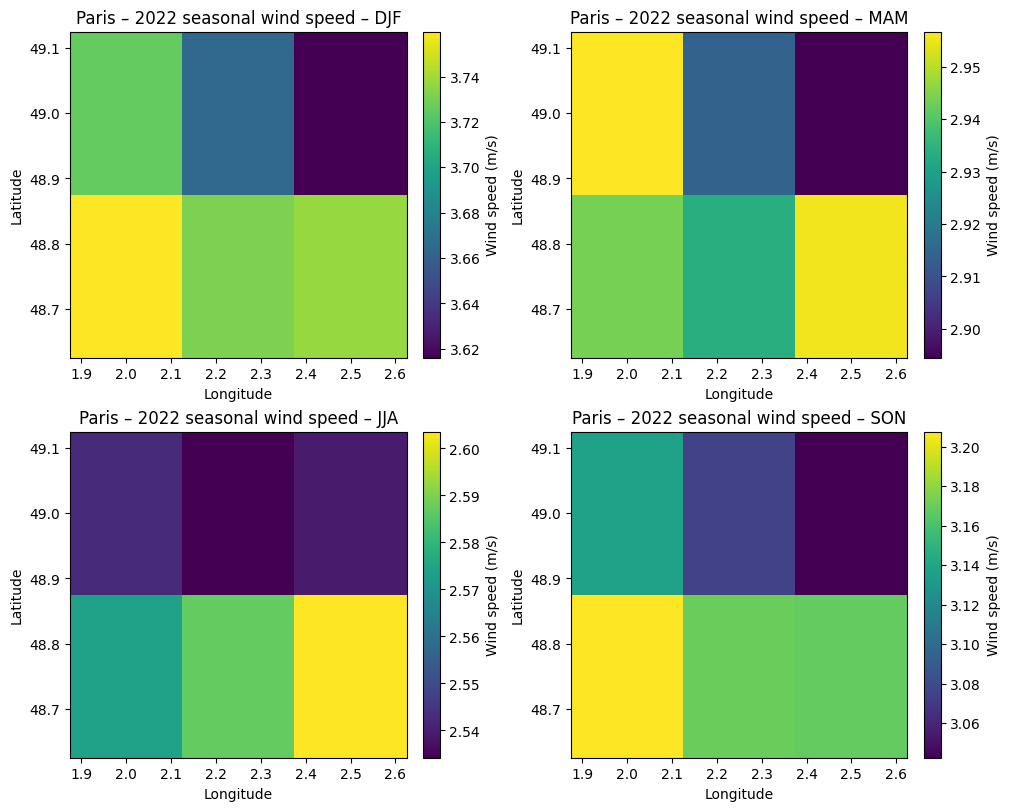

In [ ]:
# Velocità del vento (m/s)
ws_paris = np.sqrt(u10_paris**2 + v10_paris**2)

month = ws_paris["valid_time"].dt.month
seasons = {
    "DJF": [12, 1, 2],
    "MAM": [3, 4, 5],
    "JJA": [6, 7, 8],
    "SON": [9, 10, 11],
}

fig, axes = plt.subplots(2, 2, figsize=(10, 8), constrained_layout=True)
axes = axes.ravel()

for ax, (name, months) in zip(axes, seasons.items()):
    mask = month.isin(months)
    ws_season = ws_paris.where(mask, drop=True).mean("valid_time")
    ws_season.plot(
        ax=ax,
        cmap="viridis",
        cbar_kwargs={"label": "Wind speed (m/s)"},
    )
    ax.set_title(f"{city_name} – {year} seasonal wind speed – {name}")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

plt.show()


--Correlation (Paris) between wind speed and Tmax anomaly

Correlation (Paris) between wind speed and Tmax anomaly: -0.2129782302313803


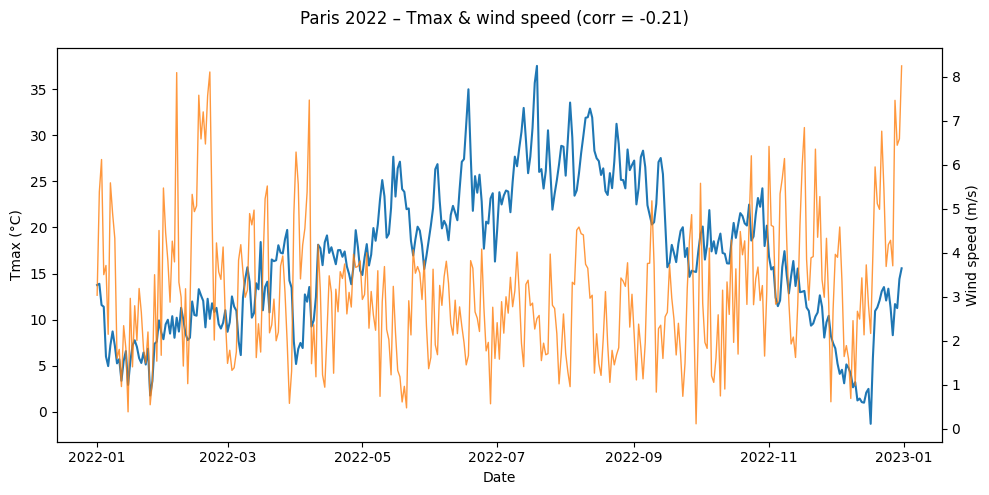

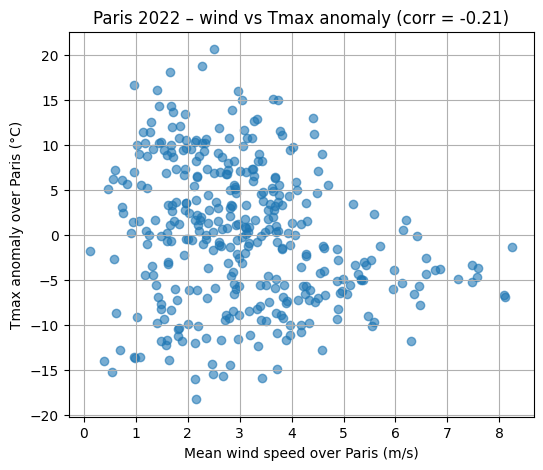

In [ ]:
# Medie spaziali su Parigi
t_paris_mean  = t2m_paris.mean(dim=("latitude", "longitude"))
ws_paris_mean = ws_paris.mean(dim=("latitude", "longitude"))

# Climatologia annuale di Tmax e anomalie
t_clim_paris = t_paris_mean.mean("valid_time")
t_anom_paris = t_paris_mean - t_clim_paris

# Correlazione vento–anomalia di Tmax
corr = np.corrcoef(ws_paris_mean.values, t_anom_paris.values)[0, 1]
print("Correlation (Paris) between wind speed and Tmax anomaly:", corr)

# Serie temporali
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.plot(t_paris_mean["valid_time"], t_paris_mean, label="Tmax (°C)", linewidth=1.5)
ax1.set_ylabel("Tmax (°C)")
ax1.set_xlabel("Date")

ax2 = ax1.twinx()
ax2.plot(ws_paris_mean["valid_time"], ws_paris_mean, color="tab:orange", label="Wind speed (m/s)", linewidth=1.0, alpha=0.8)
ax2.set_ylabel("Wind speed (m/s)")

fig.suptitle(f"{city_name} {year} – Tmax & wind speed (corr = {corr:.2f})")
fig.tight_layout()
plt.show()

# Scatter Tmax anomaly vs wind speed
plt.figure(figsize=(6,5))
plt.scatter(ws_paris_mean, t_anom_paris, alpha=0.6)
plt.xlabel("Mean wind speed over Paris (m/s)")
plt.ylabel("Tmax anomaly over Paris (°C)")
plt.title(f"{city_name} {year} – wind vs Tmax anomaly (corr = {corr:.2f})")
plt.grid(True)
plt.show()


--“hot & stagnant” days over Parigi

In [ ]:
# Soglie basate sulla distribuzione locale
ws_low_thr = np.percentile(ws_paris_mean.values, 25)   # vento basso
t_high_thr = np.percentile(t_anom_paris.values, 75)    # Tmax molto alta

flags_paris = (ws_paris_mean < ws_low_thr) & (t_anom_paris > t_high_thr)
hot_stagnant_days_paris = ws_paris_mean["valid_time"].where(flags_paris, drop=True)

print(f"Candidate 'hot & stagnant' days over {city_name}:")
for d in hot_stagnant_days_paris.values:
    print(str(d)[:10])


Candidate 'hot & stagnant' days over Paris:
2022-05-09
2022-05-17
2022-05-18
2022-05-19
2022-05-20
2022-06-03
2022-06-04
2022-06-17
2022-06-18
2022-06-28
2022-07-02
2022-07-12
2022-07-13
2022-07-21
2022-07-22
2022-07-23
2022-07-24
2022-07-29
2022-07-30
2022-08-01
2022-08-02
2022-08-03
2022-08-14
2022-08-16
2022-08-17
2022-08-20
2022-08-21
2022-08-22
2022-08-23
2022-08-24
2022-08-25
2022-09-04
2022-09-05
2022-09-14


/tmp/ipython-input-3585547488.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  idx = int(np.argwhere(t2m_paris["valid_time"].values == target_date))


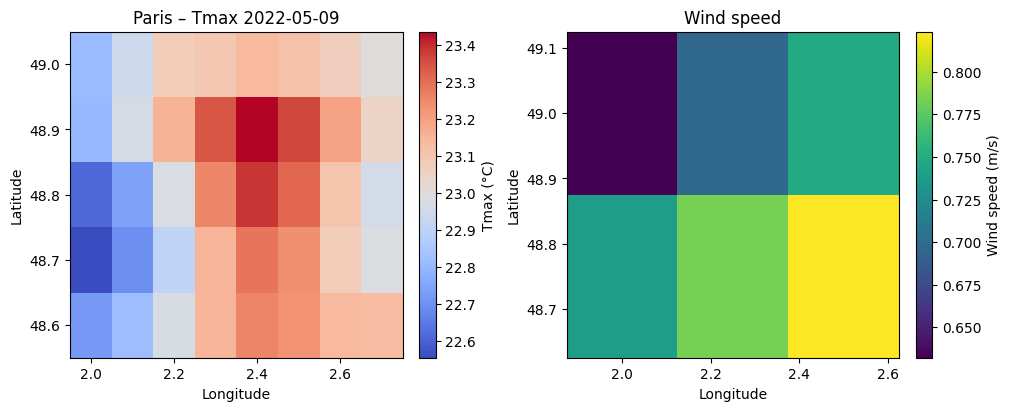

In [ ]:
if len(hot_stagnant_days_paris) > 0:
    target_date = hot_stagnant_days_paris.values[0]
    idx = int(np.argwhere(t2m_paris["valid_time"].values == target_date))

    t_day = t2m_paris.isel(valid_time=idx)
    ws_day = ws_paris.isel(valid_time=idx)

    fig, axes = plt.subplots(1, 2, figsize=(10,4), constrained_layout=True)
    t_day.plot(ax=axes[0], cmap="coolwarm",
               cbar_kwargs={"label": "Tmax (°C)"})
    axes[0].set_title(f"{city_name} – Tmax {str(target_date)[:10]}")

    ws_day.plot(ax=axes[1], cmap="viridis",
                cbar_kwargs={"label": "Wind speed (m/s)"})
    axes[1].set_title("Wind speed")
    for ax in axes:
        ax.set_xlabel("Longitude")
        ax.set_ylabel("Latitude")
    plt.show()


NDVI – Sentinel-3 OLCI

In [ ]:
!apt-get install -y libspatialindex-dev
!pip install rasterio


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c6 libspatialindex6
The following NEW packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6
0 upgraded, 3 newly installed, 0 to remove and 41 not upgraded.
Need to get 319 kB of archives.
After this operation, 1,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex6 amd64 1.9.3-2 [247 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex-c6 amd64 1.9.3-2 [55.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex-dev amd64 1.9.3-2 [16.0 kB]
Fetched 319 kB in 1s (498 kB/s)
Selecting previously unselected package libspatialindex6:amd64.
(Reading database ... 121703 files and directories currently installed.)
Preparing to unpack .../libspatialindex6_1.9.3-2_amd64.deb ...
Unp

In [ ]:
import rasterio
import os

ndvi3_dir = os.path.join(base_path, "sentinel3-olci-ndvi")
example_ndvi3 = sorted(os.listdir(ndvi3_dir))[0]  # first file in folder
ndvi3_path = os.path.join(ndvi3_dir, example_ndvi3)

with rasterio.open(ndvi3_path) as src:
    print("File:", ndvi3_path)
    print("Width x Height:", src.width, "x", src.height)
    print("Resolution:", src.res)
    print("CRS:", src.crs)
    print("Bounds:", src.bounds)


File: /content/drive/MyDrive/data_genhack/sentinel3-olci-ndvi/SENTINEL3_OLCI_Europe_NDVI_20200701.tif
Width x Height: 23185 x 14449
Resolution: (0.0029761904762040103, 0.002976190476189799)
CRS: EPSG:4326
Bounds: BoundingBox(left=-28.001488094546886, bottom=32.99851190477259, right=41.001488096243094, top=76.001488095239)


In [ ]:
import numpy as np
from rasterio.windows import Window

with rasterio.open(ndvi3_path) as src:
    window = Window(col_off=0, row_off=0, width=500, height=500)
    small_ndvi = src.read(1, window=window)

print("dtype:", small_ndvi.dtype)
print("min:", small_ndvi.min(), "max:", small_ndvi.max())
print("unique (first 10):", np.unique(small_ndvi)[:10])


dtype: uint8
min: 255 max: 255
unique (first 10): [255]


In [ ]:
with rasterio.open(ndvi3_path) as src:
    print("nodata:", src.nodata)
    print("descriptions:", src.descriptions)
    print("tags:", src.tags())


nodata: 255.0
descriptions: (None,)
tags: {'AREA_OR_POINT': 'Area'}


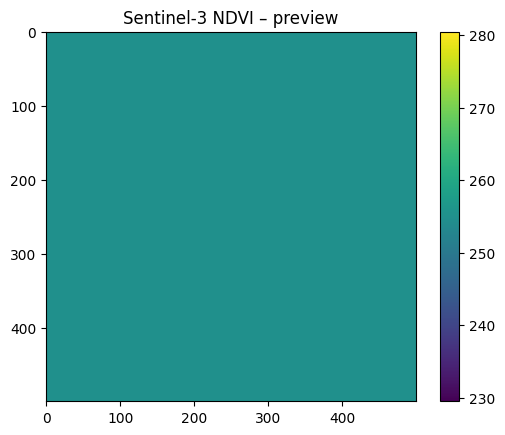

In [ ]:
from rasterio.windows import Window
import matplotlib.pyplot as plt

with rasterio.open(ndvi3_path) as src:
    window = Window(col_off=0, row_off=0, width=500, height=500)
    small_ndvi = src.read(1, window=window)

plt.imshow(small_ndvi)
plt.colorbar()
plt.title("Sentinel-3 NDVI – preview")
plt.show()


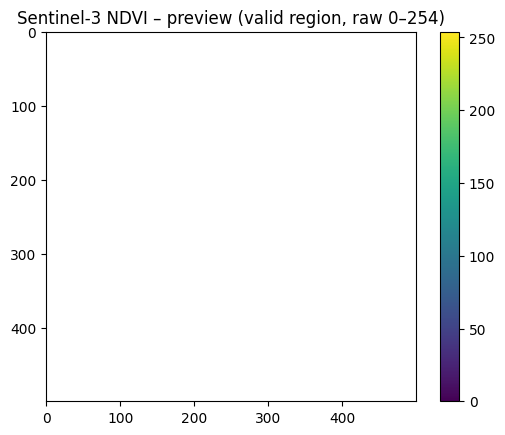

In [ ]:
from rasterio.windows import Window
import matplotlib.pyplot as plt
import numpy as np

with rasterio.open(ndvi3_path) as src:
    # take a window more in the middle of the image
    window = Window(col_off=10000, row_off=6000, width=500, height=500)
    block = src.read(1, window=window)

    # mask nodata (255)
    ndvi_raw = np.where(block == src.nodata, np.nan, block)

plt.imshow(ndvi_raw, vmin=0, vmax=254)
plt.colorbar()
plt.title("Sentinel-3 NDVI – preview (valid region, raw 0–254)")
plt.show()


In [ ]:
from rasterio.windows import Window
import numpy as np

with rasterio.open(ndvi3_path) as src:
    window = Window(col_off=10000, row_off=6000, width=500, height=500)
    block = src.read(1, window=window)

    print("Unique raw values (first 20):", np.unique(block)[:20])
    print("nodata value:", src.nodata)

    ndvi_raw = np.where(block == src.nodata, np.nan, block)
    print("All NaN?", np.isnan(ndvi_raw).all())


Unique raw values (first 20): [255]
nodata value: 255.0
All NaN? True


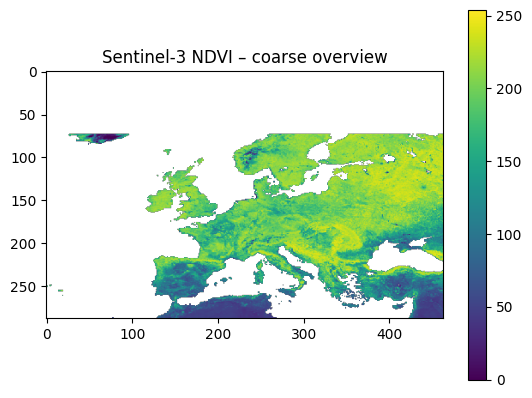

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

with rasterio.open(ndvi3_path) as src:
    # read a coarse, downsampled version of the full image
    overview = src.read(
        1,
        out_shape=(1, src.height // 50, src.width // 50),
        resampling=rasterio.enums.Resampling.nearest
    )

    ndvi_overview = np.where(overview == src.nodata, np.nan, overview)

plt.imshow(ndvi_overview, vmin=0, vmax=254)
plt.colorbar()
plt.title("Sentinel-3 NDVI – coarse overview")
plt.show()


Found non-empty window at: 16579 6574


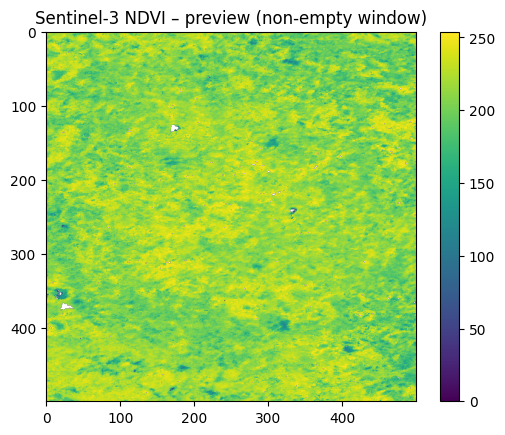

In [ ]:
import random
from rasterio.windows import Window

with rasterio.open(ndvi3_path) as src:
    for _ in range(50):  # try up to 50 random windows
        col_off = random.randint(0, src.width - 501)
        row_off = random.randint(0, src.height - 501)
        window = Window(col_off=col_off, row_off=row_off, width=500, height=500)
        block = src.read(1, window=window)

        if np.any(block != src.nodata):
            print("Found non-empty window at:", col_off, row_off)
            ndvi_raw = np.where(block == src.nodata, np.nan, block)
            plt.imshow(ndvi_raw, vmin=0, vmax=254)
            plt.colorbar()
            plt.title("Sentinel-3 NDVI – preview (non-empty window)")
            plt.show()
            break


--Crop on Paris

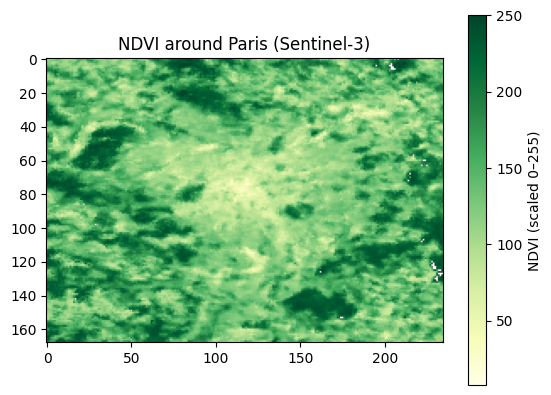

In [ ]:
import rasterio
from rasterio.windows import from_bounds

# Paris bounding box
lat_min, lat_max = 48.6, 49.1
lon_min, lon_max = 2.0, 2.7

with rasterio.open(ndvi3_path) as src:
    bbox_window = from_bounds(lon_min, lat_min, lon_max, lat_max, src.transform)
    ndvi_paris = src.read(1, window=bbox_window)
    ndvi_paris = np.where(ndvi_paris == src.nodata, np.nan, ndvi_paris)

plt.imshow(ndvi_paris, cmap="YlGn")
plt.colorbar(label="NDVI (scaled 0–255)")
plt.title("NDVI around Paris (Sentinel-3)")
plt.show()


In [ ]:
mean_ndvi = np.nanmean(ndvi_paris)
print("Mean NDVI (scaled):", mean_ndvi)


Mean NDVI (scaled): 144.97913021427667


Build a time-series of NDVI (monthly/seasonal)

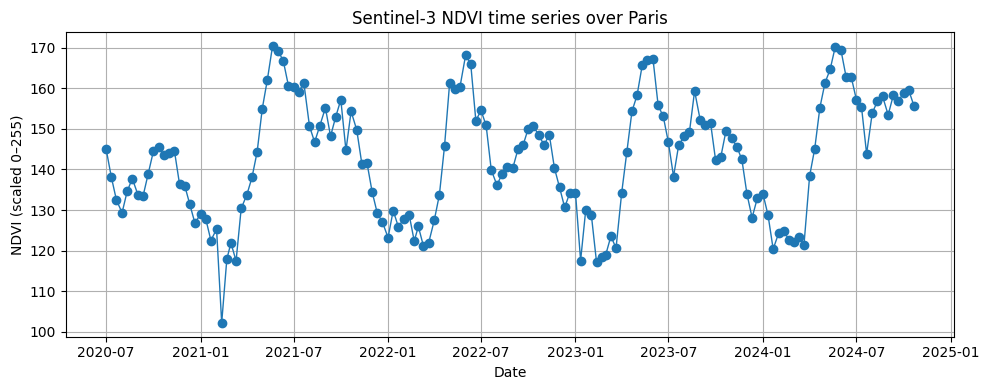

In [ ]:
import glob
import rasterio
from rasterio.windows import from_bounds
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

ndvi_files = sorted(glob.glob("/content/drive/MyDrive/data_genhack/main/sentinel3-olci-ndvi/*.tif"))

lat_min, lat_max = 48.6, 49.1
lon_min, lon_max = 2.0, 2.7

times = []
means = []

for f in ndvi_files:
    date_str = f.split("_")[-1].replace(".tif", "")  # YYYYMMDD

    try:
        with rasterio.open(f) as src:
            # build window for this file's transform
            bbox_window = from_bounds(lon_min, lat_min, lon_max, lat_max, src.transform)

            ndvi = src.read(1, window=bbox_window)
            ndvi = np.where(ndvi == src.nodata, np.nan, ndvi)

            mean_val = np.nanmean(ndvi)

    except Exception as e:
        print("Skipping file (cannot open as raster):", f)
        print("  ->", e)
        continue  # go to next file

    times.append(pd.to_datetime(date_str, format="%Y%m%d"))
    means.append(mean_val)

# Convert to a pandas Series for easier plotting
ts = pd.Series(means, index=times).sort_index()

plt.figure(figsize=(10,4))
plt.plot(ts.index, ts.values, marker="o", linewidth=1)
plt.title("Sentinel-3 NDVI time series over Paris")
plt.ylabel("NDVI (scaled 0–255)")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()


--Resample Sentinel-3 NDVI to ERA5 grid size

In [ ]:
lats = t_day_paris.latitude.values
lons = t_day_paris.longitude.values


In [ ]:
from affine import Affine

# ERA5 grid resolution
lat_res = lats[1] - lats[0]      # negative because lat decreases north→south
lon_res = lons[1] - lons[0]

# Top-left corner
top_left_lat = lats[0]
top_left_lon = lons[0]

# Build affine transform (GDAL-style)
era5_affine = Affine(lon_res, 0, top_left_lon,
                     0, lat_res, top_left_lat)


In [ ]:
# Interpolate NDVI to ERA5 grid
from rasterio.warp import reproject, Resampling

target = np.empty((t_day_paris.sizes["latitude"], t_day_paris.sizes["longitude"]))

reproject(
    source=ndvi_paris.astype(float),
    destination=target,
    src_transform=src.transform,
    src_crs=src.crs,
    dst_transform=era5_affine,
    dst_crs="EPSG:4326",
    resampling=Resampling.bilinear,
)


(array([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]]),
 Affine(np.float64(0.09999999999999432), 0.0, np.float64(2.0),
        0.0, np.float64(-0.10000000000000142), np.float64(49.000000000001265)))

--NDVI time series over Paris (robust, skipping broken files)

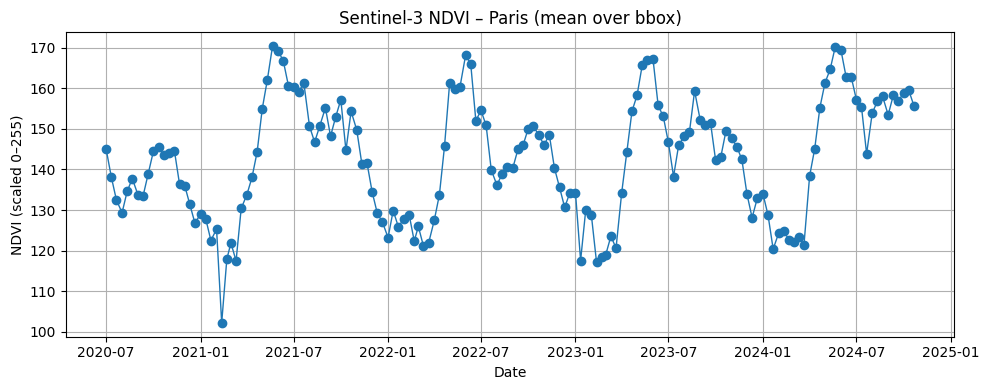

In [ ]:
ndvi_files = sorted(glob.glob(f"{ndvi3_dir}/*.tif"))

ndvi_dates = []
ndvi_means = []

for f in ndvi_files:
    date_str = f.split("_")[-1].replace(".tif", "")  # YYYYMMDD

    try:
        with rasterio.open(f) as src:
            # crop to Paris for THIS file
            win = from_bounds(lon_min, lat_min, lon_max, lat_max, src.transform)
            ndvi = src.read(1, window=win)
            ndvi = np.where(ndvi == src.nodata, np.nan, ndvi)
            mean_val = np.nanmean(ndvi)
    except Exception as e:
        print("Skipping (bad NDVI file):", f)
        print("  ->", e)
        continue

    ndvi_dates.append(pd.to_datetime(date_str, format="%Y%m%d"))
    ndvi_means.append(mean_val)

ndvi_ts = pd.Series(ndvi_means, index=ndvi_dates).sort_index()
plt.figure(figsize=(10,4))
plt.plot(ndvi_ts.index, ndvi_ts.values, marker="o", linewidth=1)
plt.title("Sentinel-3 NDVI – Paris (mean over bbox)")
plt.ylabel("NDVI (scaled 0–255)")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()


--ERA5 Tmax time series over Paris (for years covered by NDVI)

In [ ]:
# Years overlapping NDVI (adjust if needed)
years = range(2020, 2023)  # 2020–2025, for example

tmax_list = []

for year in years:
    path = f"{land_dir}/{year}_2m_temperature_daily_maximum.nc"
    try:
        ds = xr.open_dataset(path)
    except FileNotFoundError:
        print("Missing ERA5 year:", year)
        continue

    t2m = ds["t2m"] - 273.15  # °C

    # crop to Paris bbox (note: lat descending)
    t2m_paris = t2m.sel(
        latitude=slice(lat_max, lat_min),
        longitude=slice(lon_min, lon_max),
    )

    # spatial mean over Paris area
    t2m_paris_mean = t2m_paris.mean(dim=("latitude", "longitude"))
    tmax_list.append(t2m_paris_mean)

# concatenate all years along time
t_paris_all = xr.concat(tmax_list, dim="valid_time")
tmax_ts = t_paris_all.to_series().sort_index()  # pandas Series (°C)


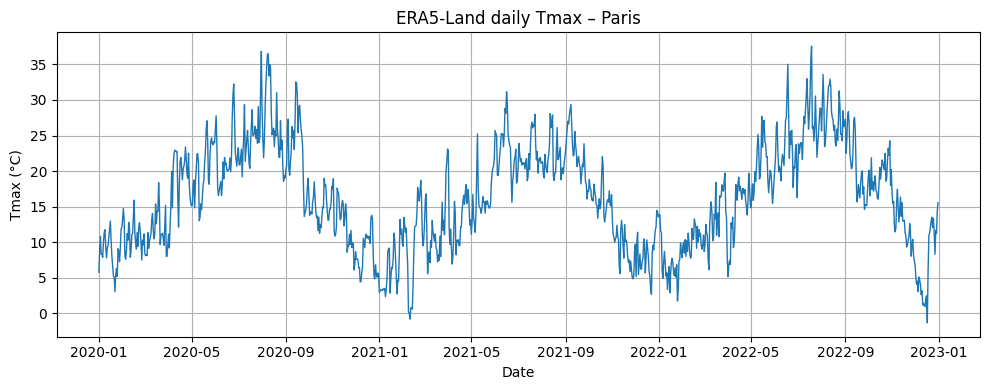

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(tmax_ts.index, tmax_ts.values, linewidth=1)
plt.title("ERA5-Land daily Tmax – Paris")
plt.ylabel("Tmax (°C)")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()


Correlate NDVI with Tmax (aligned time series)

                  NDVI       Tmax
2020-07-01  144.979130  23.270071
2020-07-11  138.175419  23.020435
2020-07-21  132.459466  25.046600
2020-08-01  129.335867  28.492229
2020-08-11  134.666996  34.967094
Number of aligned NDVI–Tmax points: 90
Correlation NDVI vs Tmax over Paris: 0.47072587308143166


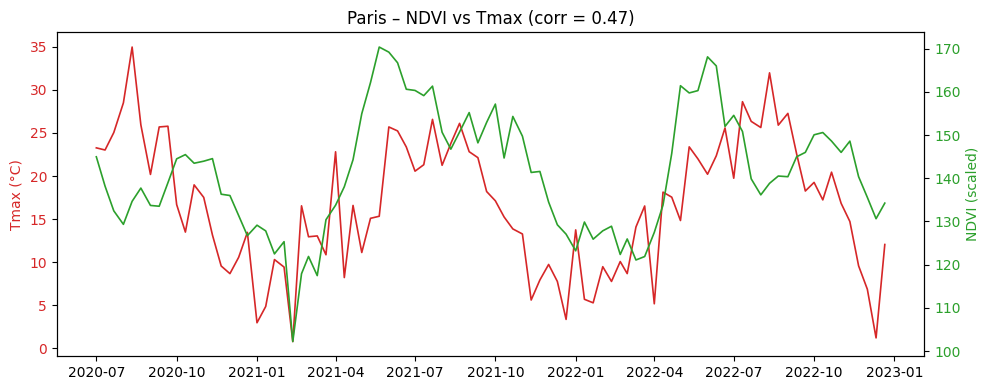

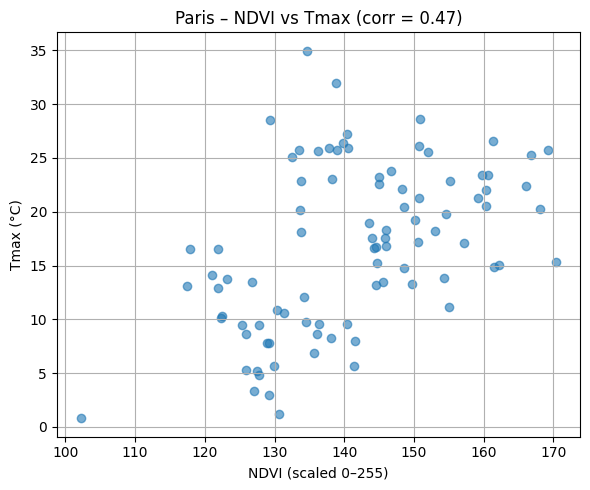

In [ ]:
# Join NDVI and Tmax on common dates
df = pd.DataFrame({
    "NDVI": ndvi_ts,
    "Tmax": tmax_ts,
}).dropna().sort_index()

print(df.head())
print("Number of aligned NDVI–Tmax points:", len(df))

# Correlation
corr = df["NDVI"].corr(df["Tmax"])
print("Correlation NDVI vs Tmax over Paris:", corr)

# Dual-axis time series
fig, ax1 = plt.subplots(figsize=(10,4))

ax1.plot(df.index, df["Tmax"], color="tab:red", label="Tmax (°C)", linewidth=1.2)
ax1.set_ylabel("Tmax (°C)", color="tab:red")
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.plot(df.index, df["NDVI"], color="tab:green", label="NDVI (0–255)", linewidth=1.2)
ax2.set_ylabel("NDVI (scaled)", color="tab:green")
ax2.tick_params(axis='y', labelcolor='tab:green')

plt.title(f"Paris – NDVI vs Tmax (corr = {corr:.2f})")
fig.tight_layout()
plt.show()

# Scatter NDVI vs Tmax
plt.figure(figsize=(6,5))
plt.scatter(df["NDVI"], df["Tmax"], alpha=0.6)
plt.xlabel("NDVI (scaled 0–255)")
plt.ylabel("Tmax (°C)")
plt.title(f"Paris – NDVI vs Tmax (corr = {corr:.2f})")
plt.grid(True)
plt.tight_layout()
plt.show()


--Seasonal green–dry cycles (monthly NDVI climatology)

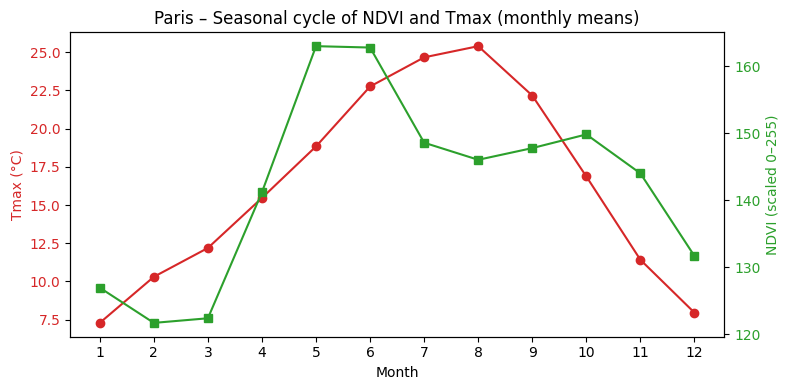

In [ ]:
ndvi_monthly = ndvi_ts.groupby(ndvi_ts.index.month).mean()
tmax_monthly = tmax_ts.groupby(tmax_ts.index.month).mean()

months = np.arange(1, 13)

fig, ax1 = plt.subplots(figsize=(8,4))

ax1.plot(months, tmax_monthly.values, marker="o", color="tab:red", label="Tmax (°C)")
ax1.set_xlabel("Month")
ax1.set_ylabel("Tmax (°C)", color="tab:red")
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.set_xticks(months)

ax2 = ax1.twinx()
ax2.plot(months, ndvi_monthly.values, marker="s", color="tab:green", label="NDVI")
ax2.set_ylabel("NDVI (scaled 0–255)", color="tab:green")
ax2.tick_params(axis='y', labelcolor='tab:green')

plt.title("Paris – Seasonal cycle of NDVI and Tmax (monthly means)")
fig.tight_layout()
plt.show()


--Highlight spatial patterns: NDVI vs Tmax map over Paris (one date)

Plotting spatial patterns for: 2020-07-01


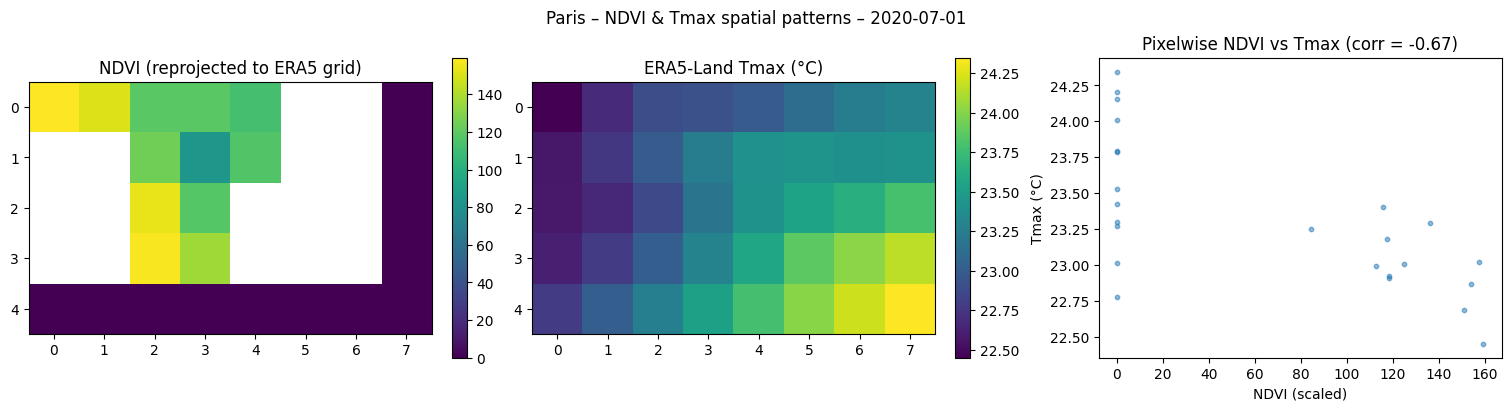

In [ ]:
from affine import Affine
from rasterio.warp import reproject, Resampling

# Pick a date that exists in both NDVI and ERA5
target_date = df.index[0]   # or choose df.index[?]

print("Plotting spatial patterns for:", target_date.date())

# --- 5.1 Get ERA5 Paris grid for that date ---
year = target_date.year
ds_era5 = xr.open_dataset(f"{land_dir}/{year}_2m_temperature_daily_maximum.nc")
t2m = ds_era5["t2m"] - 273.15

t2m_paris_full = t2m.sel(
    latitude=slice(lat_max, lat_min),
    longitude=slice(lon_min, lon_max),
)
t_day_paris = t2m_paris_full.sel(valid_time=target_date, method="nearest")

lats = t_day_paris.latitude.values
lons = t_day_paris.longitude.values

# Build ERA5 affine transform
lat_res = lats[1] - lats[0]
lon_res = lons[1] - lons[0]
top_left_lat = lats[0]
top_left_lon = lons[0]

era5_affine = Affine(lon_res, 0, top_left_lon,
                     0, lat_res, top_left_lat)

# --- 5.2 Get NDVI raster for that date and crop to Paris ---
ndvi_file = None
for f in ndvi_files:
    if target_date.strftime("%Y%m%d") in f:
        ndvi_file = f
        break

if ndvi_file is None:
    print("No NDVI file found for date", target_date)
else:
    with rasterio.open(ndvi_file) as src:
        win = from_bounds(lon_min, lat_min, lon_max, lat_max, src.transform)
        ndvi_paris = src.read(1, window=win)
        ndvi_paris = np.where(ndvi_paris == src.nodata, np.nan, ndvi_paris)

        # --- 5.3 Reproject NDVI onto ERA5 Paris grid ---
        target_ndvi = np.empty_like(t_day_paris.values, dtype=float)

        reproject(
            source=ndvi_paris.astype(float),
            destination=target_ndvi,
            src_transform=src.transform * src.transform.translation(win.col_off, win.row_off),
            src_crs=src.crs,
            dst_transform=era5_affine,
            dst_crs="EPSG:4326",
            resampling=Resampling.bilinear,
        )

        # --- 5.4 Plots ---
        fig, axes = plt.subplots(1, 3, figsize=(15,4), constrained_layout=True)

        im0 = axes[0].imshow(target_ndvi, origin="upper")
        axes[0].set_title("NDVI (reprojected to ERA5 grid)")
        plt.colorbar(im0, ax=axes[0])

        im1 = axes[1].imshow(t_day_paris.values, origin="upper")
        axes[1].set_title("ERA5-Land Tmax (°C)")
        plt.colorbar(im1, ax=axes[1])

        # Scatter NDVI–Tmax per pixel
        mask = ~np.isnan(target_ndvi)
        plt_ndvi = target_ndvi[mask].flatten()
        plt_tmax = t_day_paris.values[mask].flatten()

        axes[2].scatter(plt_ndvi, plt_tmax, alpha=0.5, s=10)
        axes[2].set_xlabel("NDVI (scaled)")
        axes[2].set_ylabel("Tmax (°C)")
        corr_spatial = np.corrcoef(plt_ndvi, plt_tmax)[0,1]
        axes[2].set_title(f"Pixelwise NDVI vs Tmax (corr = {corr_spatial:.2f})")

        fig.suptitle(f"Paris – NDVI & Tmax spatial patterns – {target_date.date()}")
        plt.show()


NDVI – Sentinel-2 composites

In [ ]:
ndvi2_dir = os.path.join(base_path, "sentinel2_ndvi")
example_ndvi2 = [f for f in os.listdir(ndvi2_dir) if f.endswith(".tif")][0]
ndvi2_path = os.path.join(ndvi2_dir, example_ndvi2)

with rasterio.open(ndvi2_path) as src:
    print("File:", ndvi2_path)
    print("Width x Height:", src.width, "x", src.height)
    print("Resolution:", src.res)
    print("CRS:", src.crs)
    print("Bounds:", src.bounds)


File: /content/drive/MyDrive/data_genhack/sentinel2_ndvi/ndvi_2019-12-01_2020-03-01.tif
Width x Height: 61776 x 52389
Resolution: (80.0, 80.0)
CRS: EPSG:3035
Bounds: BoundingBox(left=2515045.4445281317, bottom=1347741.4391018562, right=7457125.444528132, top=5538861.439101856)


Ground stations

In [ ]:
import os
os.makedirs("/content/eca", exist_ok=True)


In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/data_genhack/main/ECA_blend_tx.zip"
extract_dir = "/content/eca/ECA_blend_tx"   # LOCAL, writable

with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall(extract_dir)

print("Extracted to:", extract_dir)


Extracted to: /content/eca/ECA_blend_tx


In [ ]:
import os

for f in os.listdir(extract_dir):
    print(f)


TX_STAID024211.txt
TX_STAID018058.txt
TX_STAID026020.txt
TX_STAID018124.txt
TX_STAID002574.txt
TX_STAID027266.txt
TX_STAID025086.txt
TX_STAID017833.txt
TX_STAID004194.txt
TX_STAID017524.txt
TX_STAID004330.txt
TX_STAID027331.txt
TX_STAID005421.txt
TX_STAID004400.txt
TX_STAID026949.txt
TX_STAID025874.txt
TX_STAID002566.txt
TX_STAID008025.txt
TX_STAID000214.txt
TX_STAID023347.txt
TX_STAID011734.txt
TX_STAID000413.txt
TX_STAID001596.txt
TX_STAID000229.txt
TX_STAID025000.txt
TX_STAID025519.txt
TX_STAID007946.txt
TX_STAID023390.txt
TX_STAID027505.txt
TX_STAID024194.txt
TX_STAID007860.txt
TX_STAID023967.txt
TX_STAID000068.txt
TX_STAID023339.txt
TX_STAID001553.txt
TX_STAID024393.txt
TX_STAID018063.txt
TX_STAID018874.txt
TX_STAID026623.txt
TX_STAID003081.txt
TX_STAID027288.txt
TX_STAID002596.txt
TX_STAID008481.txt
TX_STAID024954.txt
TX_STAID004043.txt
TX_STAID004726.txt
TX_STAID018104.txt
TX_STAID026090.txt
TX_STAID027862.txt
TX_STAID026097.txt
TX_STAID018077.txt
TX_STAID011064.txt
TX_STAID0008

In [ ]:
import glob
import pandas as pd

def get_valid_years(path):
    dates = []
    with open(path, "r") as f:
        for line in f:
            line = line.strip()
            if not line or line.startswith("#"):
                continue

            parts = line.split(",")
            if len(parts) < 4:
                continue

            date_str = parts[2]
            qtx = parts[4].strip() if len(parts) > 4 else None

            # keep only valid values
            if qtx != "0":
                continue

            try:
                date = pd.to_datetime(date_str, format="%Y%m%d")
                dates.append(date)
            except:
                continue

    if len(dates) == 0:
        return None

    return min(dates), max(dates)

station_files = glob.glob(extract_dir + "/*.txt")

valid_stations = []

for f in station_files:
    years = get_valid_years(f)
    if years is None:
        continue
    start, end = years
    if end.year >= 2020:   # overlaps ERA5
        valid_stations.append((f, start, end))

valid_stations[:10]


In [ ]:
import pandas as pd

tx_path = extract_dir

df = pd.read_csv(
    tx_path,
    sep=r"\s+",
    comment="#",
    header=None,
    engine="python",
    on_bad_lines="skip"   # <-- ignore weird lines
)

print(df.head())
print("Shape:", df.shape)


          0            1           2              3        4  \
0  EUROPEAN      CLIMATE  ASSESSMENT              &  DATASET   
1       air  temperature         and  precipitation   series   
2      Int.           J.          of     Climatol.,      22,   
3      Data          and    metadata      available       at   
4      FILE       FORMAT    (MISSING          VALUE     CODE   

                    5        6         7        8            9  
0            (ECA&D),     file   created      on:   16-09-2025  
1                 for      the  European  Climate  Assessment.  
2          1441-1453.     None      None     None         None  
3  http://www.ecad.eu     None      None     None         None  
4                   =  -9999):      None     None         None  
Shape: (28746, 10)


In [ ]:
tx_path = "/content/drive/MyDrive/data_genhack/TX_STAID011758.txt"

with open(tx_path, "r") as f:
    for i in range(50):
        line = f.readline()
        print(repr(line))


'EUROPEAN CLIMATE ASSESSMENT & DATASET (ECA&D), file created on: 16-09-2025\n'
'THESE DATA CAN BE USED FOR NON-COMMERCIAL RESEARCH AND EDUCATION PROVIDED THAT THE FOLLOWING SOURCE IS ACKNOWLEDGED: \n'
'\n'
'Klein Tank, A.M.G. and Coauthors, 2002. Daily dataset of 20th-century surface\n'
'air temperature and precipitation series for the European Climate Assessment.\n'
'Int. J. of Climatol., 22, 1441-1453.\n'
'Data and metadata available at http://www.ecad.eu\n'
'\n'
'FILE FORMAT (MISSING VALUE CODE = -9999):\n'
'\n'
'01-06 STAID: Station identifier\n'
'08-13 SOUID: Source identifier\n'
'15-22 DATE : Date YYYYMMDD\n'
'24-28 TX   : Maximum temperature in 0.1 &#176;C\n'
"30-34 Q_TX : quality code for TX (0='valid'; 1='suspect'; 9='missing')\n"
'\n'
'This is the blended series of station KAMENZ, GERMANY (STAID: 11758)\n'
'Blended and updated with sources:81132 \n'
'See files sources.txt and stations.txt for more info.\n'
'\n'
'STAID, SOUID,    DATE,   TX, Q_TX\n'
' 11758, 81132,19470101,  -

In [ ]:
import pandas as pd
from io import StringIO

def read_station(path):
    header = None
    data_lines = []

    with open(path, "r") as f:
        for line in f:
            line = line.strip()
            if not line:
                continue

            # Detect the header line
            if header is None:
                if line.startswith("STAID"):
                    # this is the header: e.g. "STAID, SOUID,    DATE,   TX, Q_TX"
                    header = [h.strip() for h in line.split(",")]
                # until we find header, skip all lines
                continue

            # After header is found, every non-empty line is data
            data_lines.append(line)

    if header is None or not data_lines:
        print("No data found in", path)
        return pd.DataFrame(columns=["STAID", "SOUID", "DATE", "TX", "Q_TX"])

    # Build a CSV-like buffer just for the data rows
    buf = StringIO("\n".join(data_lines))

    df = pd.read_csv(buf, header=None, names=header)

    # Parse DATE column
    df["DATE"] = pd.to_datetime(df["DATE"].astype(str), format="%Y%m%d", errors="coerce")

    # Parse TX as numeric
    df["TX"] = pd.to_numeric(df["TX"], errors="coerce")

    # Drop invalid rows
    df = df.dropna(subset=["DATE", "TX"])

    # Convert from 0.1 °C to °C if needed
    if df["TX"].abs().median() > 60:  # typical for tenths of degrees
        df["TX"] = df["TX"] / 10.0

    return df

tx_path = "/content/drive/MyDrive/data_genhack/main/TX_STAID011758.txt"
df_station = read_station(tx_path)
print(df_station.head())
print(df_station.describe())


   STAID  SOUID       DATE    TX  Q_TX
0  11758  81132 1947-01-01  -2.0     0
1  11758  81132 1947-01-02  -1.9     0
2  11758  81132 1947-01-03  -1.5     0
3  11758  81132 1947-01-04  -6.7     0
4  11758  81132 1947-01-05 -10.9     0
         STAID    SOUID                 DATE            TX          Q_TX
count  28733.0  28733.0                28733  28733.000000  28733.000000
mean   11758.0  81132.0  1986-05-02 00:00:00   -786.080862      7.099363
min    11758.0  81132.0  1947-01-01 00:00:00   -999.900000      0.000000
25%    11758.0  81132.0  1966-09-01 00:00:00   -999.900000      9.000000
50%    11758.0  81132.0  1986-05-02 00:00:00   -999.900000      9.000000
75%    11758.0  81132.0  2005-12-31 00:00:00   -999.900000      9.000000
max    11758.0  81132.0  2025-08-31 00:00:00     37.000000      9.000000
std        0.0      0.0                  NaN    413.268302      3.673350


In [ ]:
df_clean = df_station[df_station["TX"] > -500]  # keep only valid temps


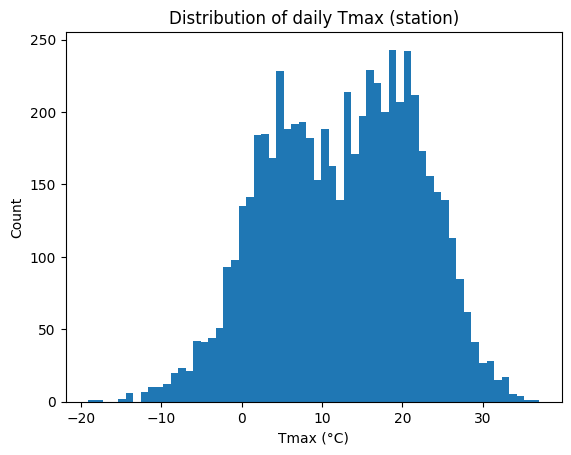

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df_clean["TX"], bins=60)
plt.title("Distribution of daily Tmax (station)")
plt.xlabel("Tmax (°C)")
plt.ylabel("Count")
plt.show()


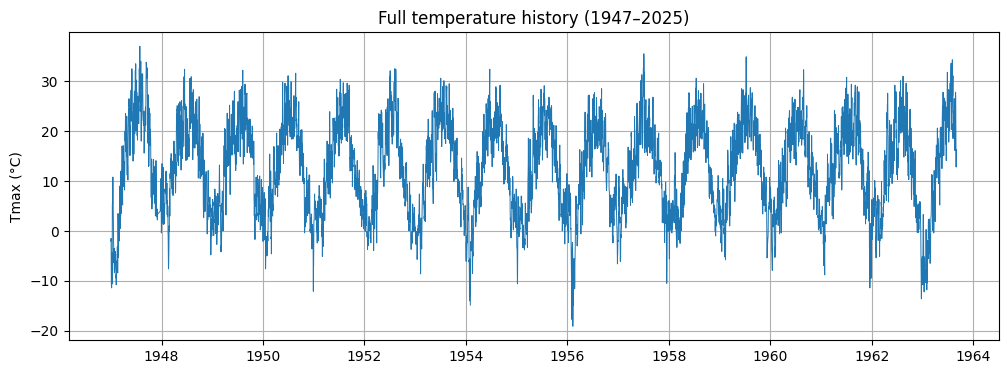

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(df_clean["DATE"], df_clean["TX"], linewidth=0.7)
plt.title("Full temperature history (1947–2025)")
plt.ylabel("Tmax (°C)")
plt.grid(True)
plt.show()


/tmp/ipython-input-3031101826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["year"] = df_clean["DATE"].dt.year
/tmp/ipython-input-3031101826.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["doy"]  = df_clean["DATE"].dt.dayofyear


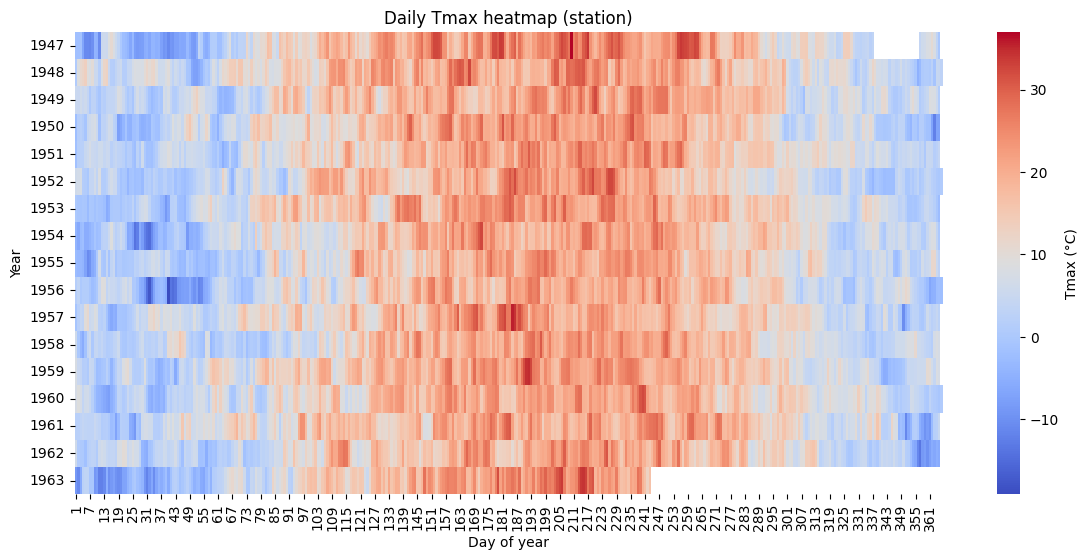

In [ ]:
import seaborn as sns
df_clean["year"] = df_clean["DATE"].dt.year
df_clean["doy"]  = df_clean["DATE"].dt.dayofyear

pivot = df_clean.pivot_table(index="year", columns="doy", values="TX")

plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap="coolwarm", cbar_kws={"label":"Tmax (°C)"})
plt.title("Daily Tmax heatmap (station)")
plt.xlabel("Day of year")
plt.ylabel("Year")
plt.show()


/tmp/ipython-input-3623662554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["month"] = df_clean["DATE"].dt.month


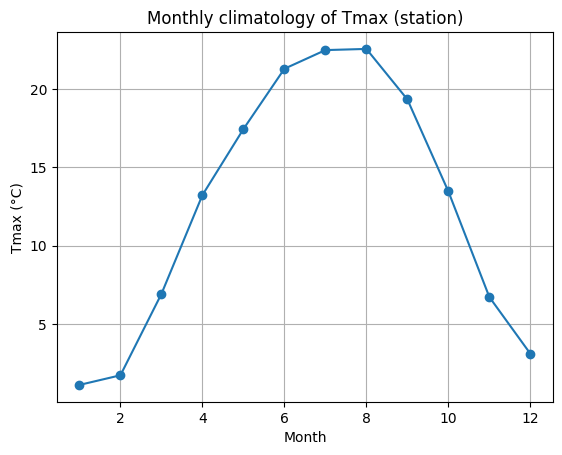

In [ ]:
df_clean["month"] = df_clean["DATE"].dt.month
monthly_mean = df_clean.groupby("month")["TX"].mean()

plt.plot(monthly_mean.index, monthly_mean.values, marker="o")
plt.title("Monthly climatology of Tmax (station)")
plt.xlabel("Month")
plt.ylabel("Tmax (°C)")
plt.grid(True)
plt.show()


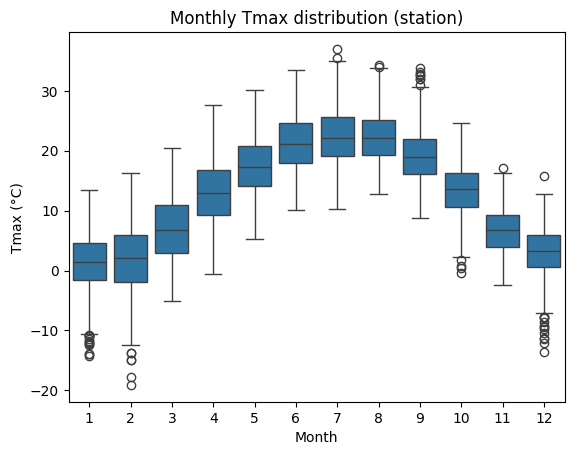

In [ ]:
import seaborn as sns

sns.boxplot(x=df_clean["month"], y=df_clean["TX"])
plt.title("Monthly Tmax distribution (station)")
plt.xlabel("Month")
plt.ylabel("Tmax (°C)")
plt.show()


In [ ]:
import glob
import pandas as pd

def get_valid_years(path):
    # read lines
    dates = []
    with open(path, "r") as f:
        for line in f:
            line = line.strip()
            # skip comments and blank lines
            if not line or line.startswith("#"):
                continue
            # must contain comma-separated data
            parts = line.split(",")
            if len(parts) < 4:
                continue

            # parts = [STAID, SOUID, DATE, TX, Q_TX]
            date_str = parts[2]
            qtx = parts[4].strip() if len(parts) > 4 else None

            # only keep valid Q_TX = 0
            if qtx != "0":
                continue

            try:
                date = pd.to_datetime(date_str, format="%Y%m%d")
                dates.append(date)
            except:
                continue

    if len(dates) == 0:
        return None

    return min(dates), max(dates)

# scan all station files
station_files = glob.glob("/content/drive/MyDrive/data_genhack/main/ECA_blend_tx/*.txt")

valid_stations = []

for f in station_files:
    years = get_valid_years(f)
    if years is None:
        continue

    start, end = years
    if end.year >= 2020:  # station has valid data overlapping ERA5
        valid_stations.append((f, start, end))

valid_stations[:10]


[]

In [ ]:
t2m_station = t2m.sel(
    latitude=lat,
    longitude=lon,
    method="nearest"
).to_series()


In [ ]:
df_compare = pd.DataFrame({
    "station": df_clean.set_index("DATE")["TX"],
    "ERA5": t2m_station,
}).dropna()


In [ ]:
print(df_clean["DATE"].min(), df_clean["DATE"].max())


1947-01-01 00:00:00 1963-08-31 00:00:00


In [ ]:
print(tmax_ts.index.min(), tmax_ts.index.max())


2020-01-01 00:00:00 2022-12-31 00:00:00


In [ ]:
df_clean[df_clean["DATE"] > "2019-01-01"].tail()


Empty DataFrame
Columns: [STAID, SOUID, DATE, TX, Q_TX, year, doy, month]
Index: []

In [ ]:
print("Station full date range:")
print(df_station["DATE"].min(), "→", df_station["DATE"].max())

print("\nValid station dates (Q_TX == 0):")
df_valid = df_station[df_station["Q_TX"] == 0]
print(df_valid["DATE"].min(), "→", df_valid["DATE"].max())

print("\nValid station dates after 2020:")
print(df_valid[df_valid["DATE"] > "2020-01-01"].head())

print("\nERA5 date range:")
print(tmax_ts.index.min(), "→", tmax_ts.index.max())


Station full date range:
1947-01-01 00:00:00 → 2025-08-31 00:00:00

Valid station dates (Q_TX == 0):
1947-01-01 00:00:00 → 1963-08-31 00:00:00

Valid station dates after 2020:
Empty DataFrame
Columns: [STAID, SOUID, DATE, TX, Q_TX]
Index: []

ERA5 date range:
2020-01-01 00:00:00 → 2022-12-31 00:00:00


In [ ]:
import pandas as pd
import os

stations_path = "/content/drive/MyDrive/data_genhack/main/stations.txt"

stations_df = pd.read_csv(
    stations_path,
    delim_whitespace=True,
    comment="#",
    engine="python"
)

print(stations_df.head())
print(stations_df.shape)


/tmp/ipython-input-2578270564.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  stations_df = pd.read_csv(


                                 EUROPEAN     CLIMATE           ASSESSMENT  \
THESE DATA        CAN                  BE        USED               FREELY   
Klein Tank,       A.M.G.              and  Coauthors,                2002.   
air   temperature and       precipitation      series                  for   
Int.  J.          of           Climatol.,         22,           1441-1453.   
Data  and         metadata      available          at  https://www.ecad.eu   

                                   &   DATASET (ECA&D),          file  \
THESE DATA        CAN       PROVIDED      THAT      THE     FOLLOWING   
Klein Tank,       A.M.G.       Daily   dataset       of  20th-century   
air   temperature and            the  European  Climate   Assessment.   
Int.  J.          of            None      None     None          None   
Data  and         metadata      None      None     None          None   

                            created    on     16-09-2025  
THESE DATA        CAN        SOUR

In [ ]:
# Preview first 50 lines to find where the header ends
with open(stations_path, 'r') as f:
    for i in range(50):
        print(i, f.readline().strip())


0 EUROPEAN CLIMATE ASSESSMENT & DATASET (ECA&D), file created on 16-09-2025
1 THESE DATA CAN BE USED FREELY PROVIDED THAT THE FOLLOWING SOURCE IS ACKNOWLEDGED:
2 
3 Klein Tank, A.M.G. and Coauthors, 2002. Daily dataset of 20th-century surface
4 air temperature and precipitation series for the European Climate Assessment.
5 Int. J. of Climatol., 22, 1441-1453.
6 Data and metadata available at https://www.ecad.eu
7 
8 FILE FORMAT (MISSING VALUE CODE IS -9999):
9 
10 01- 05 STAID  : Station identifier
11 07- 46 STANAME: Station name
12 48- 49 CN     : Country code (ISO3116 countrycodes)
13 51- 59 LAT    : Latitude in degrees:minutes:seconds (+: North, -: South)
14 61- 70 LON    : Longitude in degrees:minutes:seconds (+: East, -: West)
15 72- 76 HGTH   : Station elevation in meters
16 
17 STAID,STANAME                                 ,CN,      LAT,       LON,HGHT
18 
19 1,VAEXJOE                                     ,SE  ,+56:52:00,+014:48:00,  166
20 2,FALUN                                

In [ ]:
import pandas as pd

stations_path = "/content/drive/MyDrive/data_genhack/main/stations.txt"

stations_df = pd.read_csv(
    stations_path,
    skiprows=17,           # skip metadata lines 0..16, line 17 is header
    sep=",",               # comma-separated
    skip_blank_lines=True
)

# Drop fully empty columns (if any)
stations_df = stations_df.dropna(how="all", axis=1)


In [ ]:
stations_df.columns = [c.strip() for c in stations_df.columns]
print(stations_df.columns.tolist())


['STAID', 'STANAME', 'CN', 'LAT', 'LON', 'HGHT']


In [ ]:
def dms_to_deg(s: str) -> float:
    s = str(s).strip()
    if not s or s == "nan":
        return float("nan")
    sign = -1 if s.startswith("-") else 1
    s = s.lstrip("+-")
    d, m, sec = s.split(":")
    d = float(d)
    m = float(m)
    sec = float(sec)
    return sign * (d + m/60.0 + sec/3600.0)

stations_df["lat_deg"] = stations_df["LAT"].apply(dms_to_deg)
stations_df["lon_deg"] = stations_df["LON"].apply(dms_to_deg)

print(stations_df[["STAID", "STANAME", "CN", "lat_deg", "lon_deg", "HGHT"]].head())


   STAID                                       STANAME    CN    lat_deg  \
0      1  VAEXJOE                                       SE    56.866667   
1      2  FALUN                                         SE    60.616667   
2      3  STENSELE                                      SE    65.066667   
3      4  LINKOEPING                                    SE    58.400000   
4      5  LINKOEPING-MALMSLAETT                         SE    58.400000   

     lon_deg  HGHT  
0  14.800000   166  
1  15.616667   160  
2  17.166389   325  
3  15.533056    93  
4  15.533056    93  


Overlay of stations on ERA5 land

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


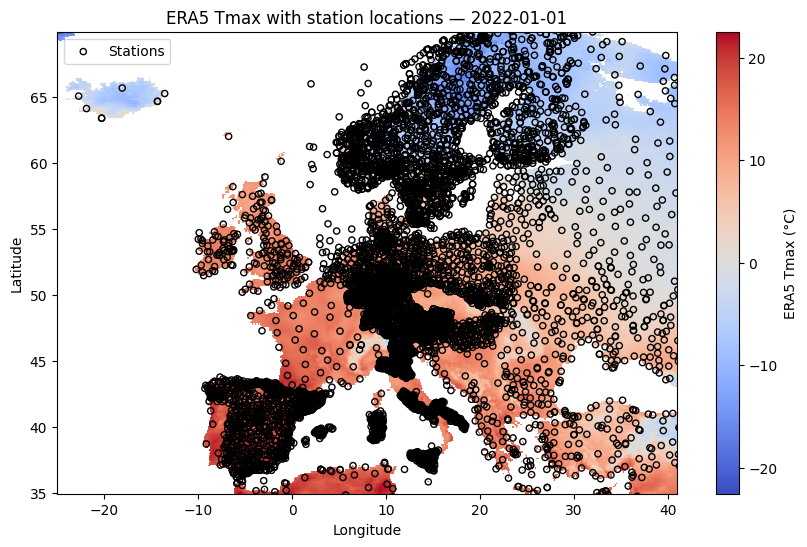

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt

# Path to your ERA5 file (adjust year if needed)
era5_path = "/content/drive/MyDrive/data_genhack/main/derived-era5-land-daily-statistics/2022_2m_temperature_daily_maximum.nc"

# Load NetCDF with xarray
ds = xr.open_dataset(era5_path)

# Convert from Kelvin to Celsius (optional)
t2m = ds['t2m'] - 273.15

day_idx = 0
t2m_day = t2m.isel(valid_time=day_idx)

plt.figure(figsize=(10, 6))
t2m_day.plot(
    cmap="coolwarm",
    cbar_kwargs={"label": "ERA5 Tmax (°C)"}
)

plt.scatter(
    stations_df["lon_deg"],
    stations_df["lat_deg"],
    edgecolor="black",
    facecolor="none",
    s=20,
    label="Stations"
)

plt.legend()
plt.title(f"ERA5 Tmax with station locations — {str(t2m_day.valid_time.values)[:10]}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
